Таблица имеет 149116 записей. Каждая запись в датасете содержит информацию о следующем: идентификаторе транзакции, дате и времени транзакции, идентификаторе и расположении магазина, идентификаторе продукта, количестве купленного товара, цене за единицу, общей сумме счета, категории, типе и детальном описании продукта, размере, названии месяца, дне недели, часе, а также числовых значениях месяца и дня недели.

In [7]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных
filename = 'coffee_shop_sales.csv'
df = pd.read_csv(filename)

# Вывод первых строк
df.head()


,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


C:\Users\Andresh\AppData\Local\Temp\ipykernel_19688\3645730883.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='product_category', y='unit_price', data=df, inner="quartile", scale="width")


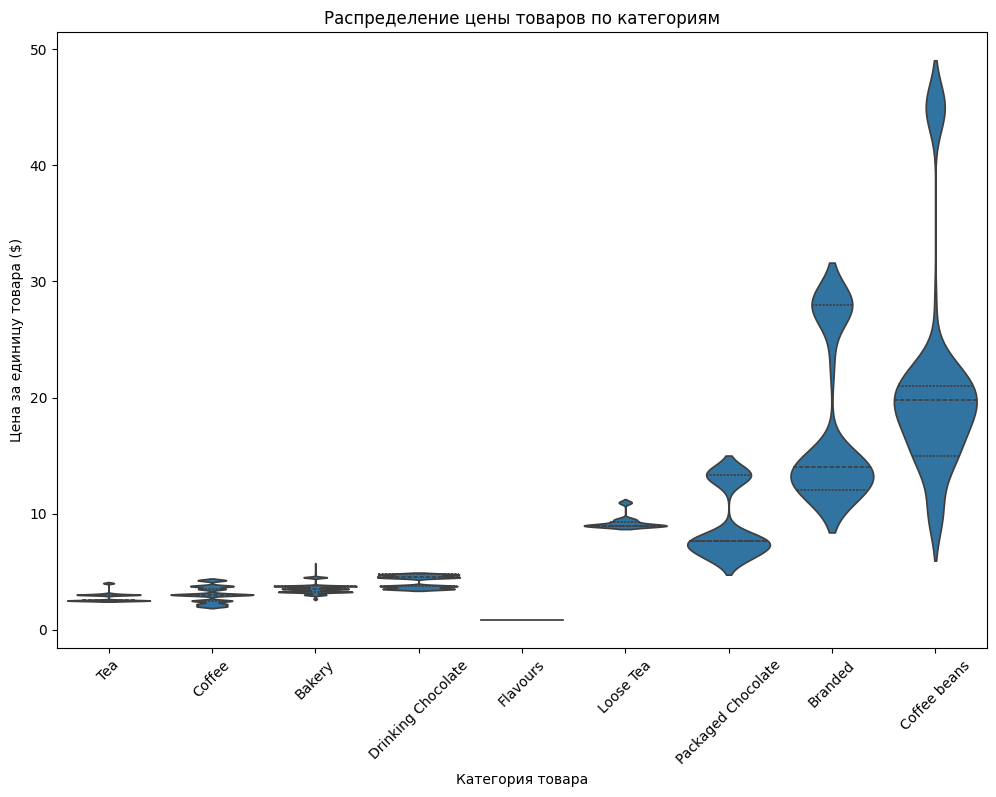

In [8]:

plt.figure(figsize=(12, 8))
sns.violinplot(x='product_category', y='unit_price', data=df, inner="quartile", scale="width")
plt.title('Распределение цены товаров по категориям')
plt.ylabel('Цена за единицу товара ($)')
plt.xlabel('Категория товара')
plt.xticks(rotation=45)
plt.show()


C:\Users\Andresh\AppData\Local\Temp\ipykernel_19688\1536202307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store_location', y='transaction_qty', data=location_data, palette='viridis')


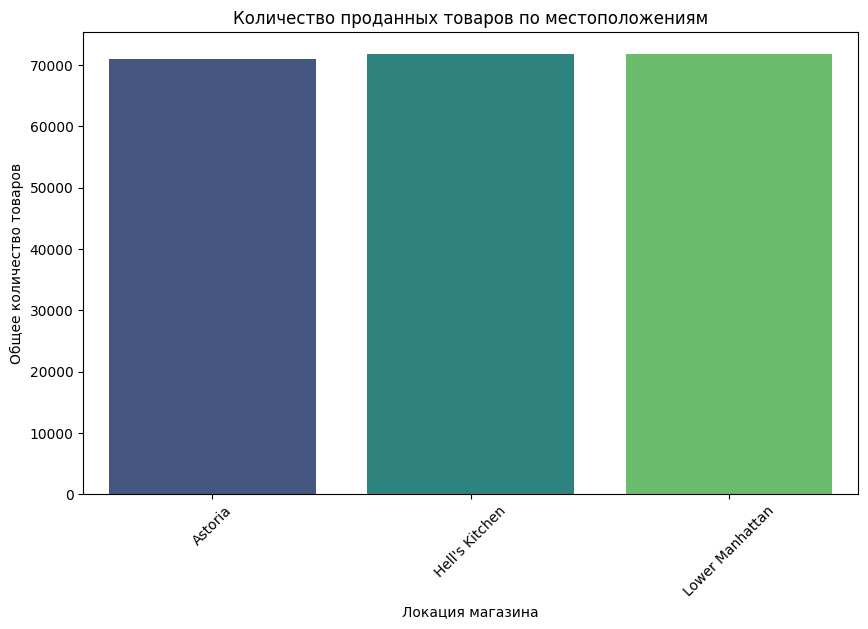

In [9]:

location_data = df.groupby('store_location').agg({'transaction_qty': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='store_location', y='transaction_qty', data=location_data, palette='viridis')
plt.title('Количество проданных товаров по местоположениям')
plt.ylabel('Общее количество товаров')
plt.xlabel('Локация магазина')
plt.xticks(rotation=45)
plt.show()


C:\Users\Andresh\AppData\Local\Temp\ipykernel_19688\515486815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category', y='Total_Bill', data=category_sales, palette='coolwarm')


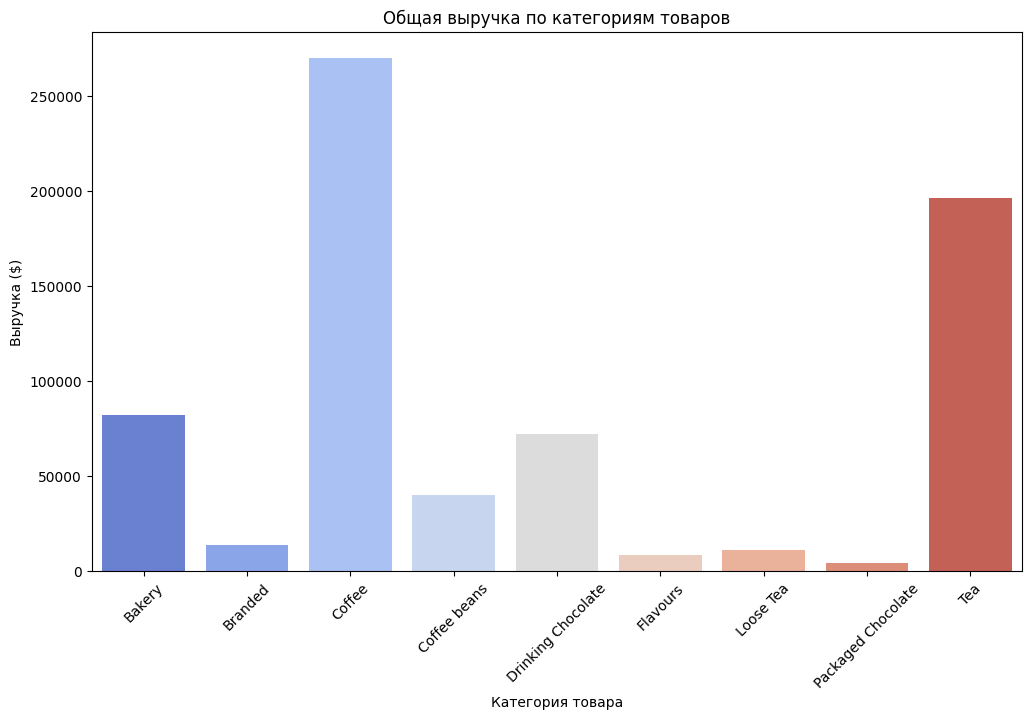

In [10]:

category_sales = df.groupby('product_category').agg({'Total_Bill': 'sum'}).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='product_category', y='Total_Bill', data=category_sales, palette='coolwarm')
plt.title('Общая выручка по категориям товаров')
plt.ylabel('Выручка ($)')
plt.xlabel('Категория товара')
plt.xticks(rotation=45)
plt.show()


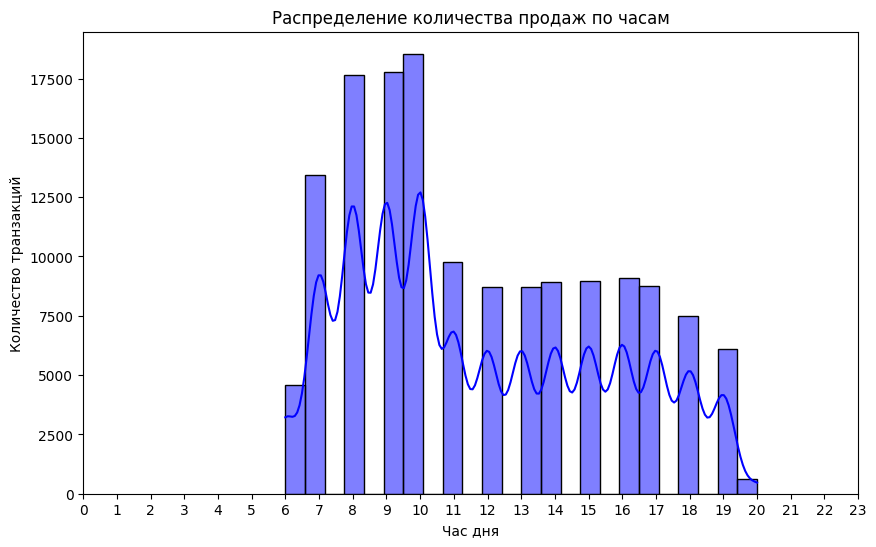

In [11]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')
plt.title('Распределение количества продаж по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество транзакций')
plt.xticks(range(0, 24))
plt.show()


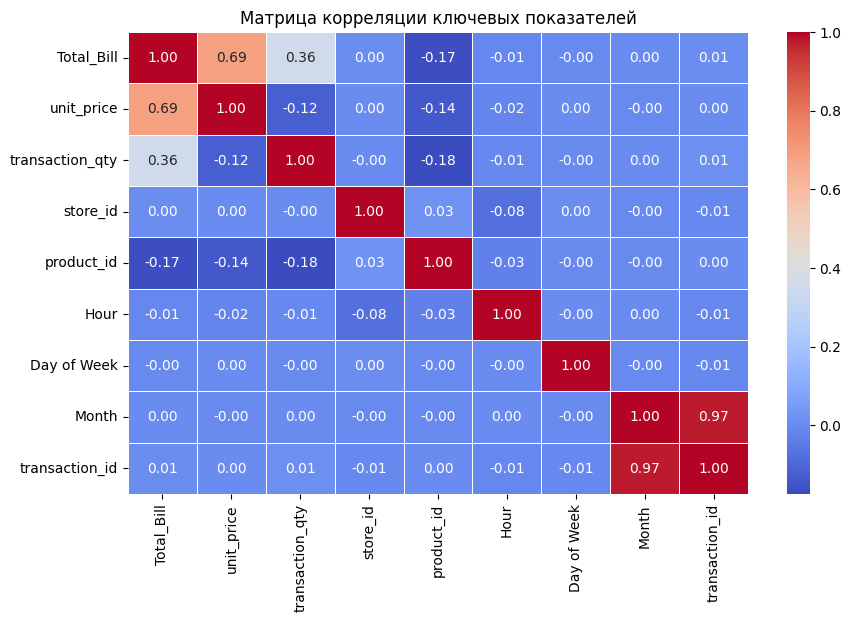

In [12]:

# Выбираем нужные столбцы для корреляционного анализа
corr_columns = ['Total_Bill', 'unit_price', 'transaction_qty', 'store_id', 
                'product_id', 'Hour', 'Day of Week', 'Month', 'transaction_id']

# Строим корреляционную матрицу
correlation_matrix = df[corr_columns].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции ключевых показателей')
plt.show()



Total_Bill и unit_price имеют коэффициент корреляции 0.67. Это указывает на значительную положительную связь: рост стоимости единицы товара (unit_price) сопровождается увеличением общего объема продаж (Total_Bill).
Total_Bill и transaction_qty коррелируют на уровне 0.35. Это также указывает на положительную, но менее значительную связь: увеличение количества купленных единиц товара связано с ростом общего объема продаж.
Переменные, такие как store_id, product_id, Hour, и Day of Week, демонстрируют крайне низкую корреляцию с большинством других переменных. Это говорит о том, что они имеют слабое влияние на другие показатели.
Коэффициент корреляции между Month и transaction_id равен 0.94, что объясняется, скорее всего, технической зависимостью, так как идентификатор транзакции может быть связан с месяцем (например, в нумерации).